In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:05<00:00, 273MB/s]
100% 1.06G/1.06G [00:05<00:00, 200MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
from rembg import remove
from PIL import Image



In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

#Convolution Layer
#ReLU Layer được thêm vào Convolution Layer để đảm bảo các giá trị là non-linear
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization()) #Chuẩn hóa giá trị đầu ra và tăng tốc độ học của mạng
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #Max pooling layer

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten()) #Flatten Layer

model.add(Dense(128,activation='relu')) #Fully Connection Layer
model.add(Dropout(0.1)) #Giảm overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid')) #Kích hoạt hàm sigmod để dùng cho bài toán phân loại

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5,
                                            patience=1,  verbose=1)

In [ ]:
estop=tf.keras.callbacks.EarlyStopping( monitor="val_loss",  patience=3,
                                         verbose=1,
                                         restore_best_weights=True)

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds, callbacks=[estop, rlronp])

Epoch 1/10
625/625 [==============================] - 76s 107ms/step - loss: 1.4757 - accuracy: 0.5808 - val_loss: 0.6284 - val_accuracy: 0.6450 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6074 - accuracy: 0.6793 - val_loss: 0.5438 - val_accuracy: 0.7210 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - ETA: 0s - loss: 0.5007 - accuracy: 0.7583
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
625/625 [==============================] - 67s 107ms/step - loss: 0.5007 - accuracy: 0.7583 - val_loss: 0.5770 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4006 - accuracy: 0.8185 - val_loss: 0.4159 - val_accuracy: 0.8066 - lr: 5.0000e-04
Epoch 5/10
625/625 [==============================] - ETA: 0s - loss: 0.3520 - accuracy: 0.8431
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
625/625 [======================

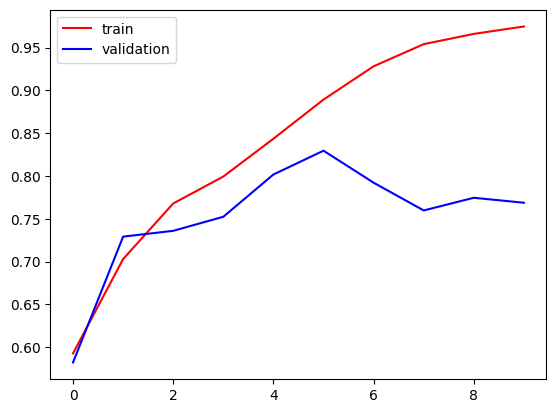

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

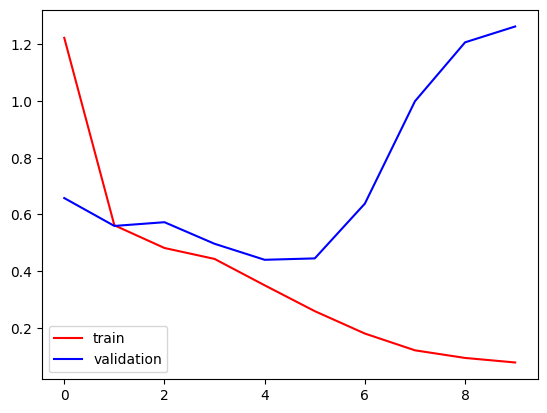

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/hinh-anh-chiec-meo-cute_042939175.jpg')

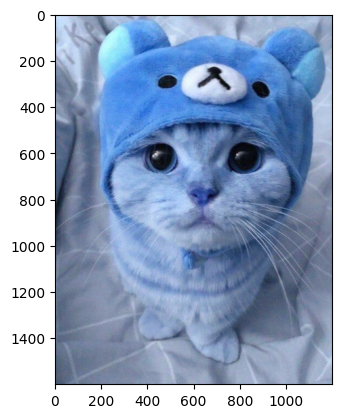

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1600, 1200, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)